In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fminist = tf.keras.datasets.fashion_mnist

In [3]:
(x_train, y_train), (x_test, y_test) = fminist.load_data()

4422102/4422102 [==============================] - 18s 4us/step


LABEL: 9

IMAGE PIXEL [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 

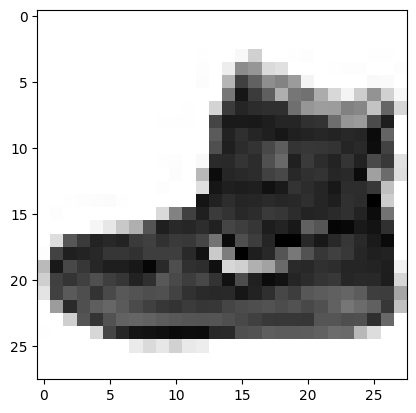

In [4]:
def visu(index):
  np.set_printoptions(linewidth=320)

  print(f"LABEL: {y_train[index]}")
  print(f"\nIMAGE PIXEL {x_train[index]}")

  plt.imshow(x_train[index], cmap='Greys')




visu(0)

In [5]:
## normalizando os dados

x_train = x_train/255.0
x_test = x_test/255.0

LABEL: 0

IMAGE PIXEL [[0.         0.         0.         0.         0.         0.00392157 0.         0.         0.         0.         0.16078431 0.7372549  0.40392157 0.21176471 0.18823529 0.16862745 0.34117647 0.65882353 0.52156863 0.0627451  0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.00392157 0.         0.         0.         0.19215686 0.53333333 0.85882353 0.84705882 0.89411765 0.9254902  1.         1.         1.         1.         0.85098039 0.84313725 0.99607843 0.90588235 0.62745098 0.17647059 0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.05490196 0.69019608 0.87058824 0.87843137 0.83137255 0.79607843 0.77647059 0.76862745 0.78431373 0.84313725 0.8        0.79215686 0.78823529 0.78823529 0.78823529 0.81960784 0.85490196 0.87843137 0.64313725 0.         0.         0.         0.        ]
 [0.         0.         0.         0.        

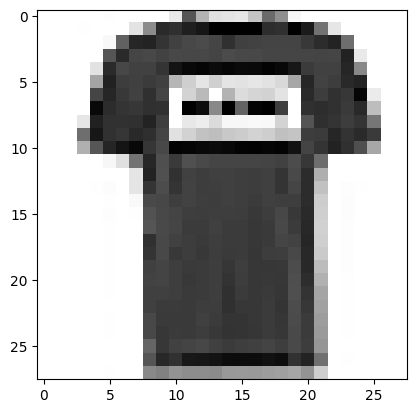

In [6]:
visu(1)

In [7]:
model = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),


    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)]
  )


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [8]:
class MyCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epochs, logs={}):
    if logs.get('loss') < 0.4:
      print("Done with training")
      self.model.stop_training = True


callback = MyCallback()

In [9]:
## acuracia(teste) antes do conv e do pooling = 88%


model.compile(optimizer=tf.optimizers.Adam(),
              loss = "sparse_categorical_crossentropy",
              metrics=['accuracy'])

model.fit(x_train,y_train,epochs=5)  ##, callbacks=[callback])

Epoch 1/5
1875/1875 [==============================] - 18s 4ms/step - loss: 0.4359 - accuracy: 0.8414
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2932 - accuracy: 0.8933
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2446 - accuracy: 0.9095
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2129 - accuracy: 0.9194
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1871 - accuracy: 0.9295


In [10]:
model.evaluate(x_test, y_test)  # depois do pooling e conv2d = 90%

313/313 [==============================] - 1s 3ms/step - loss: 0.2459 - accuracy: 0.9105


[0.24587076902389526, 0.9104999899864197]

1/1 [==============================] - 0s 25ms/step


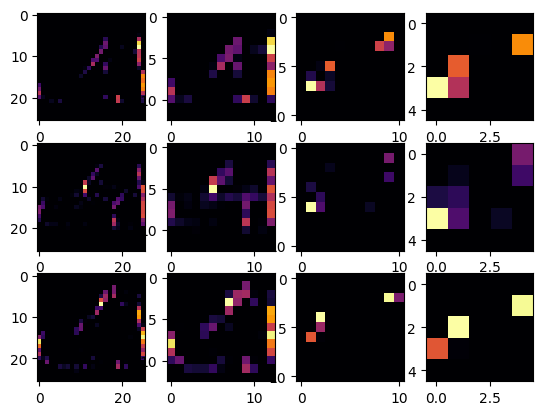

In [11]:
from tensorflow.keras import models

f, axarr = plt.subplots(3,4)

FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 1

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

for x in range(0,4):
  f1 = activation_model.predict(x_test[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  
  f2 = activation_model.predict(x_test[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  
  f3 = activation_model.predict(x_test[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)